# US Apple Stores and States Data Analysis

Below we are going to analyze some data from US Apple Stores and States

Import functions to use in data analysis and processing

In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Read in CSV files for processing

In [32]:
df = pd.read_csv('USAppleStores.csv')
pop = pd.read_csv('US City Populations.csv')

Check data type of each attribute/column of each file

In [11]:
for col in df.columns:
    print(col, type(df[col][0]))

Store_Name <class 'str'>
Street_Address <class 'str'>
City <class 'str'>
State <class 'str'>
Zip <class 'numpy.int64'>
Phone <class 'str'>
Latitude <class 'numpy.float64'>
Longitude <class 'numpy.float64'>


In [12]:
for col in pop.columns:
    print(col, type(pop[col][0]))

State <class 'str'>
City <class 'str'>
Population <class 'str'>
Unnamed: 3 <class 'numpy.float64'>
Unnamed: 4 <class 'numpy.float64'>
Unnamed: 5 <class 'numpy.float64'>
Unnamed: 6 <class 'numpy.float64'>


Check head and tail of each file

In [14]:
df.head()

,Store_Name,Street_Address,City,State,Zip,Phone,Latitude,Longitude
0,The Summit,217 Summit Boulevard,Birmingham,AL,35243,(205) 909-2570,33.446515,-86.729632
1,Bridge Street,320 The Bridge Street,Huntsville,AL,35806,(256) 327-8800,34.716019,-86.672816
2,Anchorage 5th Avenue Mall,320 West 5th Avenue,Anchorage,AK,99501,(907) 257-1900,61.217081,-149.888511
3,Chandler Fashion Center,3111 W Chandler Boulevard,Chandler,AZ,85226,(480) 636-3900,33.305673,-111.897756
4,SanTan Village,2218 E. Williams Field Road,Gilbert,AZ,85295,(480) 366-8477,33.308807,-111.742700


In [15]:
df.tail()

,Store_Name,Street_Address,City,State,Zip,Phone,Latitude,Longitude
265,Tacoma Mall,4502 S Steele Street,Tacoma,WA,98409,(253) 620-1454,47.216417,-122.467857
266,Southcenter,801 Southcenter Mall,Tukwila,WA,98188,(206) 288-4400,47.459419,-122.260765
267,Bayshore,5715 N Centerpark Way,Glendale,WI,53217,(414) 977-3410,43.121606,-87.915052
268,West Towne,18 West Towne Mall,Madison,WI,53719,(608) 827-9840,43.057412,-89.512696
269,Mayfair,2500 N. Mayfair Road,Wauwatosa,WI,53226,(414) 290-9780,43.063848,-88.045648


In [16]:
pop.head()

,State,City,Population,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Alabama,Abernant,"7,599",NaN,NaN,NaN,NaN
1,Alabama,Alabaster,"31,545",NaN,NaN,NaN,NaN
2,Alabama,Albertville,"21,458",NaN,NaN,NaN,NaN
3,Alabama,Alexander City,"14,849",NaN,NaN,NaN,NaN
4,Alabama,Andalusia,"9,081",NaN,NaN,NaN,NaN


In [17]:
pop.tail()

,State,City,Population,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
7694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7697,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7698,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove unwanted/unused attributes/columns from each file

In [18]:
df_new = df.drop(columns=['Latitude','Longitude'])

In [20]:
pop_new = pop[['State','Population']]

Check if unwanted/unused attributes/columns have been dropped/removed

In [19]:
for col in df_new.columns:
    print(col, type(df_new[col][0]))

Store_Name <class 'str'>
Street_Address <class 'str'>
City <class 'str'>
State <class 'str'>
Zip <class 'numpy.int64'>
Phone <class 'str'>


In [21]:
for col in pop_new.columns:
    print(col, type(pop_new[col][0]))

State <class 'str'>
Population <class 'str'>


Count how many Apple Stores are in each state

In [25]:
state_counts = df['State'].value_counts()
print(state_counts)

CA    53
NY    21
TX    18
FL    17
NJ    12
MA    11
VA     9
IL     9
PA     9
OH     8
CT     7
CO     6
WA     6
GA     6
AZ     6
MI     6
MN     5
MD     5
NV     5
NC     5
TN     4
OR     3
MO     3
NH     3
UT     3
WI     3
HI     3
AL     2
SC     2
LA     2
KY     2
OK     2
IN     2
AR     1
DE     1
DC     1
ID     1
NE     1
RI     1
MS     1
KS     1
NM     1
ME     1
AK     1
IA     1
Name: State, dtype: int64


Create Bar Graph with state_counts variable

Text(0.5, 1.0, 'US Apple Stores Across the States')

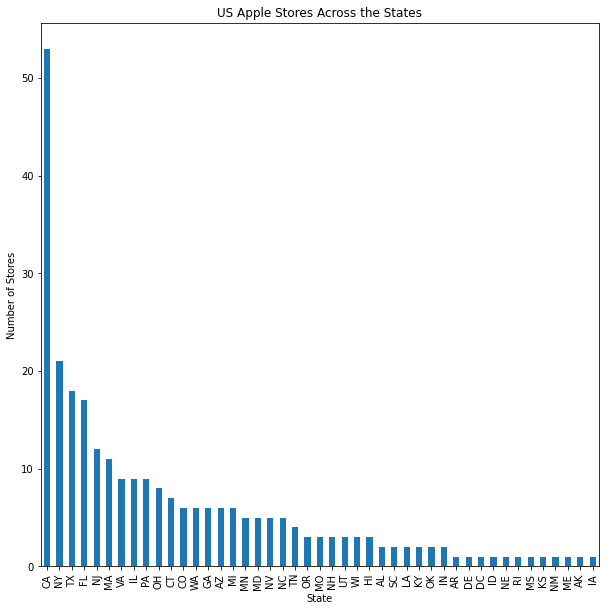

In [33]:
state_counts.plot.bar()
plt.xlabel('State')
plt.ylabel('Number of Stores')
plt.rcParams["figure.figsize"] = 10,10
plt.title('US Apple Stores Across the States')

Display data types for pop_new

In [42]:
display(pop_new.dtypes)

State          object
Population    float64
dtype: object

Convert 'Population' attribute to float format 

In [43]:
pd.options.display.float_format = '{:.0f}'.format

Check first few rows with head function to ensure proper formatting

In [45]:
pop_new.head()

,State,Population
0,Alabama,7599
1,Alabama,31545
2,Alabama,21458
3,Alabama,14849
4,Alabama,9081


Group Population by State using the Sum operator

In [46]:
pop_new.groupby(['State']).sum()

,Population
State,
Alabama,2871858
Alaska,504693
Arizona,6414744
Arkansas,1506563
California,42058827
Colorado,5835761
Connecticut,3438343
DC,658893
Delaware,656848


Create variable to store states population summary analysis 

In [49]:
pop_sum = pop_new.groupby(['State']).sum()

Create a bar graph with pop_sum variable of US States Population

Text(0.5, 1.0, 'Population Across the States')

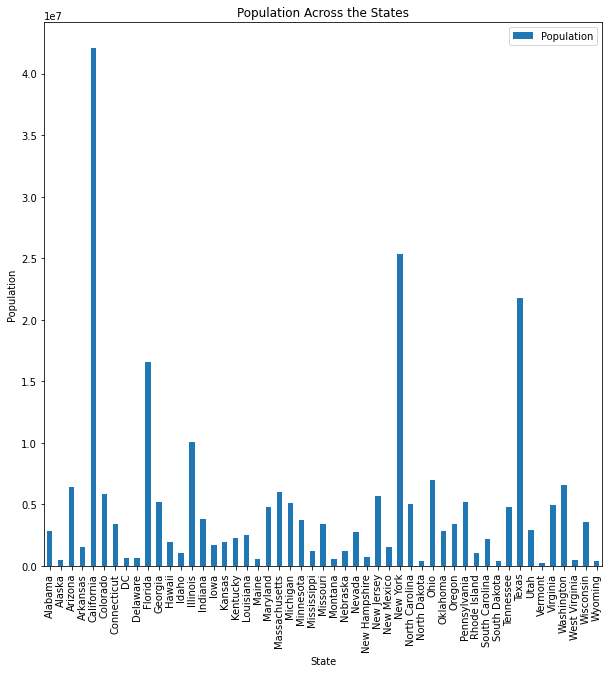

In [51]:
pop_sum.plot.bar()
plt.xlabel('State')
plt.ylabel('Population')
plt.rcParams["figure.figsize"] = 10,10
plt.title('Population Across the States')

Export a copy of the new/revised csv files

In [52]:
state_counts.to_csv('USAppleStoresStates.csv', index=False)
pop_sum.to_csv('USPopulationByStates.csv', index=False)